In [11]:
# 기본 import 패키지
from IPython.display import display
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler
# pip install mglearn 실행해야 함.
import mglearn

%matplotlib inline

# 한글출력
matplotlib.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 150
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

### 2.3.4 나이브 베이즈 분류기
특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기의 일종이다.
베이즈 정리는 사전확률과 사후확률의 관계를 나타내는 정리로 사전확률을알면 사후확률을 구할 수 있다.

* 나이브 베이즈<sup>naive bayes</sup> 분류기는 앞 절의 선형 모델과 매우 유사합니다. 
* LogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른 편이지만, 그 대신 일반화 성능이 조금 뒤집니다.


나이브 베이즈 분류기가 효과적인 이유
* 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합하기 때문입니다. 
* scikit-learn에 구현된 나이브 베이즈 분류기는 GaussianNB, BernoulliNB, MultinomialNB 이렇게 세 가지입니다. 
 - GaussianNB는 연속적인 어떤 데이터에도 적용할 수 있고 
 - BernoulliNB는 이진 데이터를, 
 - MultinomialNB는 카운트 데이터(특성이 어떤 것을 헤아린 정수 카운트로, 예를 들면 문장에 나타난 단어의 횟수입니다)에 적용
 - BernoulliNB, MultinomialNB는 대부분 텍스트 데이터를 분류할 때 사용합니다
 (GaussianNB는 역속적인 데이터에, MultinomialNB와 BernoulliNB는 이산적인 데이터에 적용)

BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셉니다. 예를 보면 쉽게 이해할 수 있습니다.

In [12]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])



* 이진 특성을 4개 가진 데이터 포인트가 4개 있습니다. 클래스는 0과 1, 두 개입니다. 
* 출력 y의 클래스가 0인 경우(첫 번째와 세 번째 데이터 포인트), 
  - 첫 번째 특성은 0이 두 번이고 0이 아닌 것은 한 번도 없습니다. 
  - 두 번째 특성은 0이 한 번이고 1도 한 번입니다. 
* 같은 방식으로 두 번째 클래스에 해당하는 데이터 포인트에 대해서도 계산합니다. 

클래스별로 0이 아닌 원소를 세는 과정을 요약하면 다음과 같습니다.
> 클래스의 값이 0 또는 1뿐이므로 1이 나타난 횟수를 세는 것은 특성의 값을 모두 더한 것과 같습니다. 클래스 0인 경우, 즉 첫 번째와 세 번째 행에서 1이 나타난 횟수를 행을 따라(axis=0) 합산하면 [0, 1, 0, 2]입니다. 클래스 1인 경우, 두 번째와 네 번째 행에서 1이 나타난 횟수를 행을 따라(axis=0) 합산하면 [2, 0, 2, 1]입니다.

In [13]:
counts = {}
for label in np.unique(y):
    # 클래스마다 반복
    # 특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n{}".format(counts))

특성 카운트:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


* 다른 두 나이브 베이즈 모델 MultinomialNB와 GaussianNB는 계산하는 통계 데이터의 종류가 조금 다릅니다. 
* MultinomialNB는 클래스별로 특성의 평균을 계산하고 GaussianNB는 클래스별로 각 특성의 표준편차와 평균을 저장합니다.

* 예측할 땐 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 합니다.  


** 장단점과 매개변수 **

* MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있습니다. 
* alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가합니다. 
* 이는 통계 데이터를 완만하게 만들어줍니다. alpha가 크면 더 완만해지고 모델의 복잡도는 낮아집니다. 
  * alpha에 따른 알고리즘 성능 변동은 비교적 크지 않아서, alpha 값이 성능 향상에 크게 기여하지 않습니다. 
  * 그러나 이 값을 조정하면 어느 정도는 정확도를 높일 수 있습니다.


* GaussianNB는 대부분 매우 고차원인 데이터셋에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용합니다. 
* MultinomialNB는 보통 0이 아닌 특성이 비교적 많은 데이터셋(예를 들어 큰 문서들)에서 BernoulliNB보다 성능이 높습니다.


* 나이브 베이즈 모델과 선형 모델의 장단점은 비슷합니다. 
* 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉽습니다. 
* 희소한 고차원 데이터에서 잘 작동하며 매개변수에 민감하지 않습니다. 
* 선형 모델로는 학습 시간이 너무 오래 걸리는 매우 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만하며 종종 사용됩니다.

### 2.3.5 결정트리

결정에 다다르기 위해 예/아니오 질문을 이어 나가면서 학습.


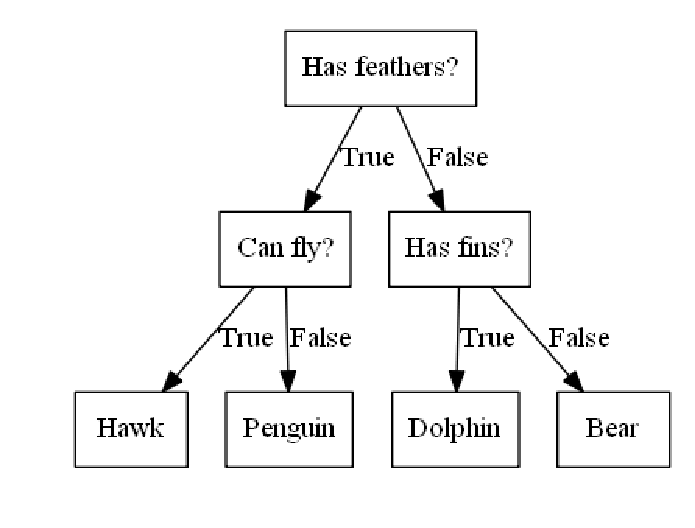

In [14]:
mglearn.plots.plot_animal_tree()

* 노드(node): 질문이나 정답을 담은 네모 상자(특히 마지막 노드는 리프<sup>leaf</sup>라고도 함)
* 엣지(edge): 질문의 답과 다음 질문을 연결
* 루트 노드<sup>root node</sup> : 포인트 모두를 포함한 전체 데이터셋
* 순수 노드<sup>pure node</sup> : 타깃 하나만 이루어진 리프 노드

#### 결정 트리 만들기
결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 예/아니오 질문 목록을 학습한다는 것(머신러닝에서는 이런 질문을 테스트라고함). 타겟을 가장 많이 구분할 수 있는 값을 찾는다.

* 보통의 데이터는 예/아니오 형태이 특성으로 구성되지 않음.
* two_moons 데이터와 같이 연속된 특성을 가짐.
 > two_moons : 각 클래스에 데이터가 50개씩 있는 2차원 반달 데이터셋(원-50개의 클래스0, 삼각형-50개의 클래스1)
* 연속적인 데이터에 적용할 테스트는 "특성 $i$는 값 $a$보다 큰가?"의 형태를 띤다.
![](https://tensorflowkorea.files.wordpress.com/2017/06/2-23.png?w=425)


![](https://tensorflowkorea.files.wordpress.com/2017/06/2-24.png?w=1025)

그림 2-24 깊이 1인 결정 트리(오른쪽)가 만든 결정 경계(왼쪽)

![](https://tensorflowkorea.files.wordpress.com/2017/06/2-25.png?w=1025)

그림 2-25 깊이 3인 결정 트리(오른쪽)가 만든 결정 경계(왼쪽)

![](https://tensorflowkorea.files.wordpress.com/2017/06/2-26.png?w=1025)

그림 2-26 깊이 9인 결정 트리(오른쪽)가 만든 결정 경계(왼쪽)

이 과정은 각 노드가 테스트 하나씩을 가진 이진 결정 트리를 만든다. 
* 즉, 각 테스트는 하나의 축을 따라 데이터를 둘로 나누는 것으로 생각할 수 있다.
* 각 테스트는 하나의 특성에 대해서 만 이루어지므로 나누어진 영역은 항상 축에 평행하다.
* 데이터를 분할하는 것은 각 분할된 영역이 하나의 타깃값(하나의 클래스 또는 하나의 회귀 분석 결과)을 가질 때까지 반복
* 새로운 데이터 포인터에 대한 예측은 주어진 데이터 포인트가 특성을 분할한 영역들 중 어디에 놓이는지를 확인하면 된다. 그래서 그 영역의 타깃값 중 다수인 것을 예측 결과로 한다.


* 회귀 문제에도 트리를 사용할 수 있다. 예측하려는 새로운 데이터 포인트에 해당하는 리프노드를 찾고 찾은 리프노드의 훈련 데이터 평균값이 이 데이터 포인트의 출력값이 된다.

In [15]:
# 전체 결정트리 처리 함수
# mglearn.plots.plot_tree_progressive()

#### 결정 트리의 복잡도 제어하기
* 일반적으로 트리 만들기를 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고 훈련 데이터에 과대적합된다(순수 노드로 이루어진 트리는 훈련 세트에 100% 정확하게 맞는다는 의미입니다).
* 그림 2-26의 왼쪽 그래프가 과대적합 된 것으로 불 수 있다. 클래스 0으로 결정된 영역이 클래스 1로 둘러쌓인 것을 볼 수 있다(그 반대도 있음).
* 이 경우는 결정 경계가 클래스의 포인트들에서 멀리 떨어진 이상치<sup>outlier</sup> 하나에 너무 민감하기 때문이다.


* 과대적합을 막는 방법
 1. 트리 생성을 일찍 중단하는 전략(사전 가지치기<sup>pre-pruning</sup>) - 트리의 최대 깊이나 리프의 최대 개수를 제한하는 방법, 노드가 분할하기 위한 포인트의 최소 개수를 지정하는 방법이 있다.
 2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략(사후 가지치기<sup>post-pruning</sup> 또는 그냥 가지치기<sup>pruning</sup>)
 

scikit-learn에서 결정 트리는 DecisionTreeRegressor와 DecisionTreeClassifier에 구현되어 있습니다. scikit-learn은 **사전 가지치기**만 지원합니다.  

유방암 데이터셋을 이용하여 사전 가지치기의 효과를 자세히 확인해보자.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 569개
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# 기본 설정은 모든 리프가 순수 노드가 될 때까지 트리 생성
tree = DecisionTreeClassifier(random_state=0) # random_state 옵션을 고정해 만들어진 트리를 같은 조건으로 비교
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [17]:
X_train.shape

(426, 30)

* 기대한 대로 모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100%입니다. 
* 즉 트리는 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊게 만들어졌습니다. 
* 테스트 세트의 정확도는 이전에 본 선형 모델에서의 정확도인 95%보다 조금 낮습니다.  


* 사전 가지치기를 트리에 적용해서 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막아보겠습니다. 
* 한 가지 방법은 일정 깊이에 도달하면 트리의 성장을 멈추게 하는 것입니다. max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한합니다.
* 트리 깊이를 제한하면 과대적합이 줄어듭니다. 이는 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선시킵니다.

In [43]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


#### 결정 트리 분석
* 트리 모듈의 export_graphviz 함수를 이용해 트리를 시각화할 수 있습니다.
* 이 함수는 그래프 저장용 텍스트 파일 포맷인 .dot 파일을 만듭니다. 
* 각 노드에서 다수인 클래스를 색으로 나타내기 위해 옵션을 주고 적절히 레이블되도록 클래스 이름과 특성 이름을 매개변수로 전달합니다.


In [44]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot",encoding='UTF8') as f:
    dot_graph = f.read()
#display(graphviz.Source(dot_graph))
#
# train 개수 426

![](https://tensorflowkorea.files.wordpress.com/2017/06/2-27.png?w=1025)

* 트리를 시각화하면 알고리즘의 예측이 어떻게 이뤄지는지 잘 이해할 수 있다.
* 트리의 깊이가 4만 되어도 매우 복잡하게 된다.  

* sample은 각 노드에 있는 샘플의 수
* value는 각 클래스당 샘플의 수 

#### 트리의 특성 중요도

* 전체 트리를 살펴보는 것은 어려울 수 있으니, 대신 트리가 어떻게 작동하는지 요약하는 속성들을 사용할 수 있습니다. 
* 가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도<sup>feature importance</sup>입니다.
* 이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻입니다. 
* 특성 중요도의 전체 합은 1입니다

In [45]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


선형 모델의 계수를 시각화하는 것과 비슷한 방법으로 특성 중요도도 시각화할 수 있습니다(그림 2-28).

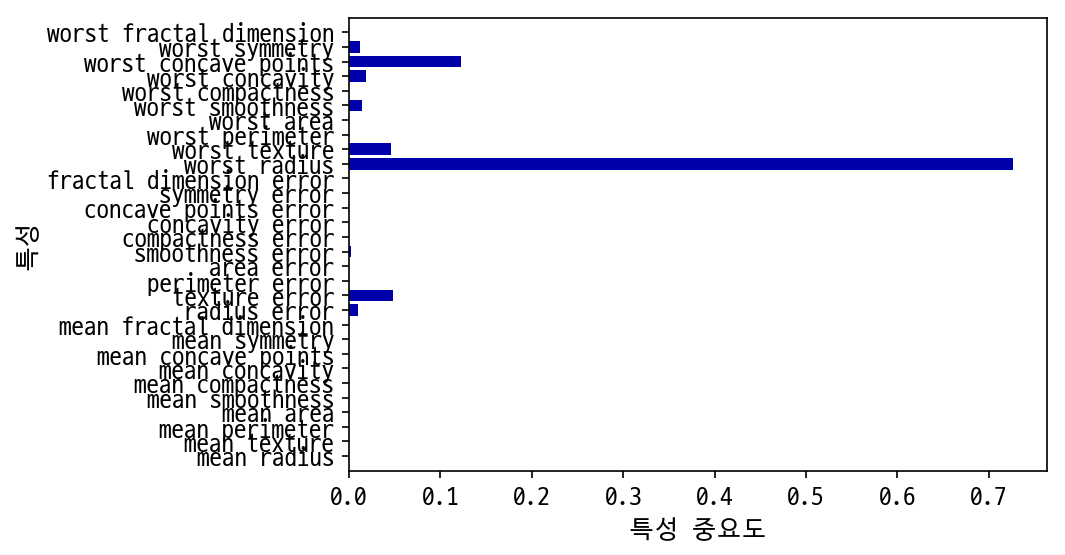

In [46]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

그림 2-28 유방암 데이터로 학습시킨 결정 트리의 특성 중요도

* 첫 번째 노드에서 사용한 특성(“worst radius”)이 가장 중요한 특성으로 나타납니다. 
* 이 그래프는 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 우리의 관찰을 뒷받침해줍니다.
* 그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아닙니다. 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있습니다.

* 선형 모델의 계수와는 달리, 특성 중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지는 알 수 없습니다. 
* 즉 특성 중요도의 값은 “worst radius”가 중요하다고 알려주지만 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알 수 없습니다.   


사실, 특성과 클래스 사이에는 간단하지 않은 관계가 있을 수 있으며 다음 예에서 이런 점을 살펴보겠습니다.


Feature importances: [0. 1.]


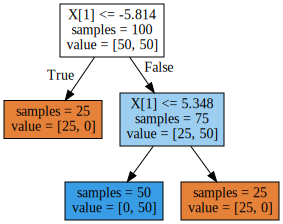

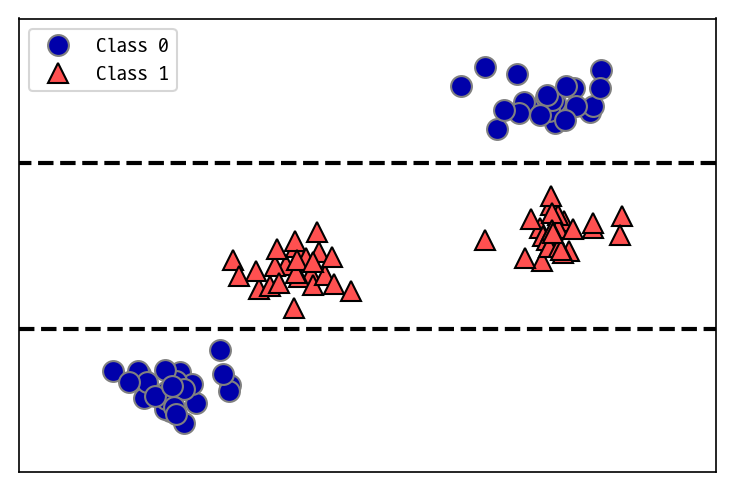

In [22]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 그림 2-29 y 축의 특성이 클래스 레이블과 복합적인 관계를 가지고 있는 2차원 데이터셋과 결정 트리가 만든 결정 경계

그림 2-30 [그림 2-29]에 나타난 데이터로 학습한 결정 트리

위 그래프에서 특성은 y축에 단순히 비례/반비례하지 않는다.  

DecisionTreeRegressor로 구현된 회귀 결정 트리에도 비슷하게 적용된다.
회귀를 위한 트리 기반의 모델은 외삽 extrapolation, 즉 훈련 데이터의 범위 밖의 포인트에 대해 예측할 수 없다.  

아래는 로그 스케일로 그린 연도별 RAM 가격이다.

Text(0,0.5,'가격 ($/Mbyte)')

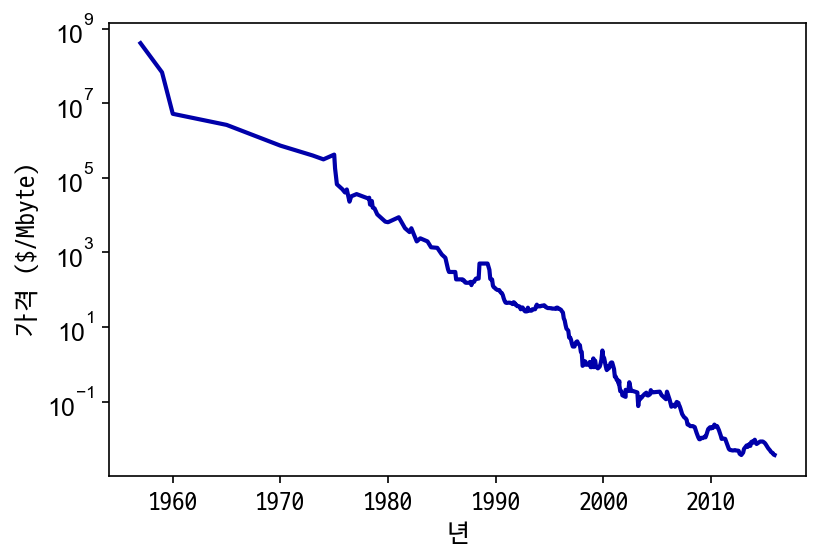

In [23]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

* y축(가격)은 로그 스케일로 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 예측이 쉬워진다.
* 2000년 전까지의 데이터로 2000년 후의 데이터를 예측해보자. 
* 선형회귀(LinearRegression)와 트리회귀(DecisionTreeRegressor)를 비교한다. 
* 모델을 훈련시키고 예측을 수행한 후 로그 스케일로 되돌리기 위해 지수 함수를 사용한다.

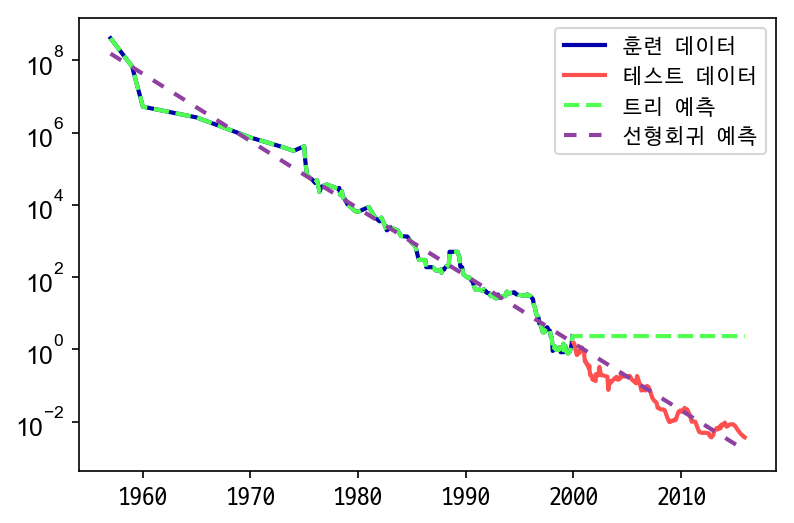

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

* 선형 모델은 직선으로 데이터를 근사하여 결과를 예측하지만 
* 트리 모델은 훈련 데이터는 완벽히 예측하지만 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 사용해 예측한다. 
* 이는 모든 트리 기반 모델의 공통된 단점이다.

#### 장점과 매개변수 
* 트리에서는 복잡도를 조절하기 위해 사전 가지치기를 한다. 
* 보통은 사전 자기치기 방법 중 max_depth, max_leaf_nodes(리프 노드의 최대 개수 지정), min_samples_leaf(리프 노드가 되기 위한 최소한의 샘플 개수를 지정) 중 하나만 지정해도 과대적합을 막는데 충분하다.  
  
* 결정 트리가 다른 알고리즘들보다 나은 점

 - 만들어진 모델을 쉽게 시각화할 수 있어 분석이 쉽다.
 - 데이터의 스케일에 구애받지 않으며 특성의 정규화나 표준화 같은 전처리 과정이 필요 없다. 특성의 스케일이 다르거나 이진 특성과 연속적인 특성이 혼합되어 있을 때도 잘 작동한다.
* 단점
 - 사전 가지치기를 사용함에도 과대적합하는 경향이 있다.
 - 이를 보완하기 위해 앙상블 방법을 단일 결정 트리의 대안으로 흔히 사용한다.

### 2.3.6 결정 트리의 앙상블

앙상블<sup>ensemble</sup>: 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법으로 두 앙상블 모델이 분류와 회귀 문제의 다양한 데이터셋에서 효과적.
* **랜덤 포레스트**와 **그래디언트 부스팅 회귀 트리**가 많이 사용한다.  

### 랜덤 포레스트
* 결정트리의 주요 단점은 훈련 데이터에 과대적합되는 경향이 있다는 것이다.
* 랜덤 포레스트는 조금씩 다른 여러 결정 트리를 묶음으로써 훈련 데이터에 과대적합하는 결정 트리의 문제를 회피할 수 있다.  
* 랜덤 포레스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만 데이터의 일부에 과대적합하는 경향을 가진다는 데 기초함
  - 잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합을 줄일 수 있다.
  - 이런 전략을 구현하려면 결정 트리를 많이 만들어야 한다.
  - 각 트리는 타킷 예측을 잘 해야하고 다른 트리와는 구별되어야 한다(트리 생성시 무작위성을 주입).
  
트리를 랜덤하게 만들기 위한 방법
 * 데이터 포인트를 무작위로 선택
 * 분할 테스트에서 특성을 무작위로 선택


 


#### 랜덤 포레스트 구축
* 랜덤 포레스트 모델을 만들려면 생성할 트리의 개수를 정해야 한다(RandomForestRegressor나 RandomForestClassifier의 n_estimators 매개변수)
* 이 트리들은 완전히 독립적으로 만들어져야 하고 이를 위해 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 한다.

* 트리를 만들기 위해 우선 데이터의 부트스트랩 샘플<sup>bootstrap sample</sup>을 생성한다(n_samples 개의 데이터로 n_samples 회수만큼 반복 추출, 즉 중복 추출이 가능).
* 만들어진 데이터셋으로 결정 트리를 만든다.
* 이 때 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니라 알고리즘이 각 노드에서 후보 특성(feature)을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다(몇 개의 특성을 고를지는 max_features 매개변수로 조정).
* 후보 특성을 고르는 것은 매 노드마다 반복되므로 트리의 각 노드는 각 다른 후보 특성을 사용하여 테스트를 만든다.

> 부트 스트랩 샘플링은 랜덤 포레스트의 트리가 조금씩 다른 데이터셋을 이용해 만들어지도록 하고 또한 각 노드에서 특성의 일부만 사용하기 때문에 각 분기는 각기 다른 특성 부분 집합을 사용한다. 이 두 메커니즘이 랜덤 포레스트의 모든 트리가 달라지도록 만든다.

* 이 방식의 핵심 매개변수는 max_features로 n_features로 설정하면 각 분기에서 모든 특성을 고려하므로 특성 선택의 무작위성이 들어가지 않는다.
* max_features=1로 설정하면 트리의 분기는 테스트할 특성을 고를 필요가 없게 되며 그냥 무작위로 선택한 특성의 임계값을 찾기만 하면 된다.
* 결국 max_features값을 크게 하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰진다. 반면에 낮추면 랜덤 포레스트의 트리들은 많이 달라지고 각 트리는 데이터에 맞추기 위해 깊이가 깊어지게 된다.


* 랜덤 포레스트로 예측은 알고리즘이 모델에 있는 모든 트리의 예측을 만단다. 
* 그리고, 회귀의 경우에는 이 예측들을 평균하여 최종 예측을 만들고 분류의 경우에는 각 알고리즘이 가능성 있는 출력 레이블의 확률을 제공함으로써 간접적인 예측(약한 투표 전략)을 한다. 트리들이 예측한 확률을 평균내어 가장 높은 확률을 가진 클래스가 예측값이 된다.


#### 랜덤 포레스트 분석
앞의 two_moons 데이터를 가지고 트리 5개로 구성된 랜덤 포레스트 모델을 만들어보자. 

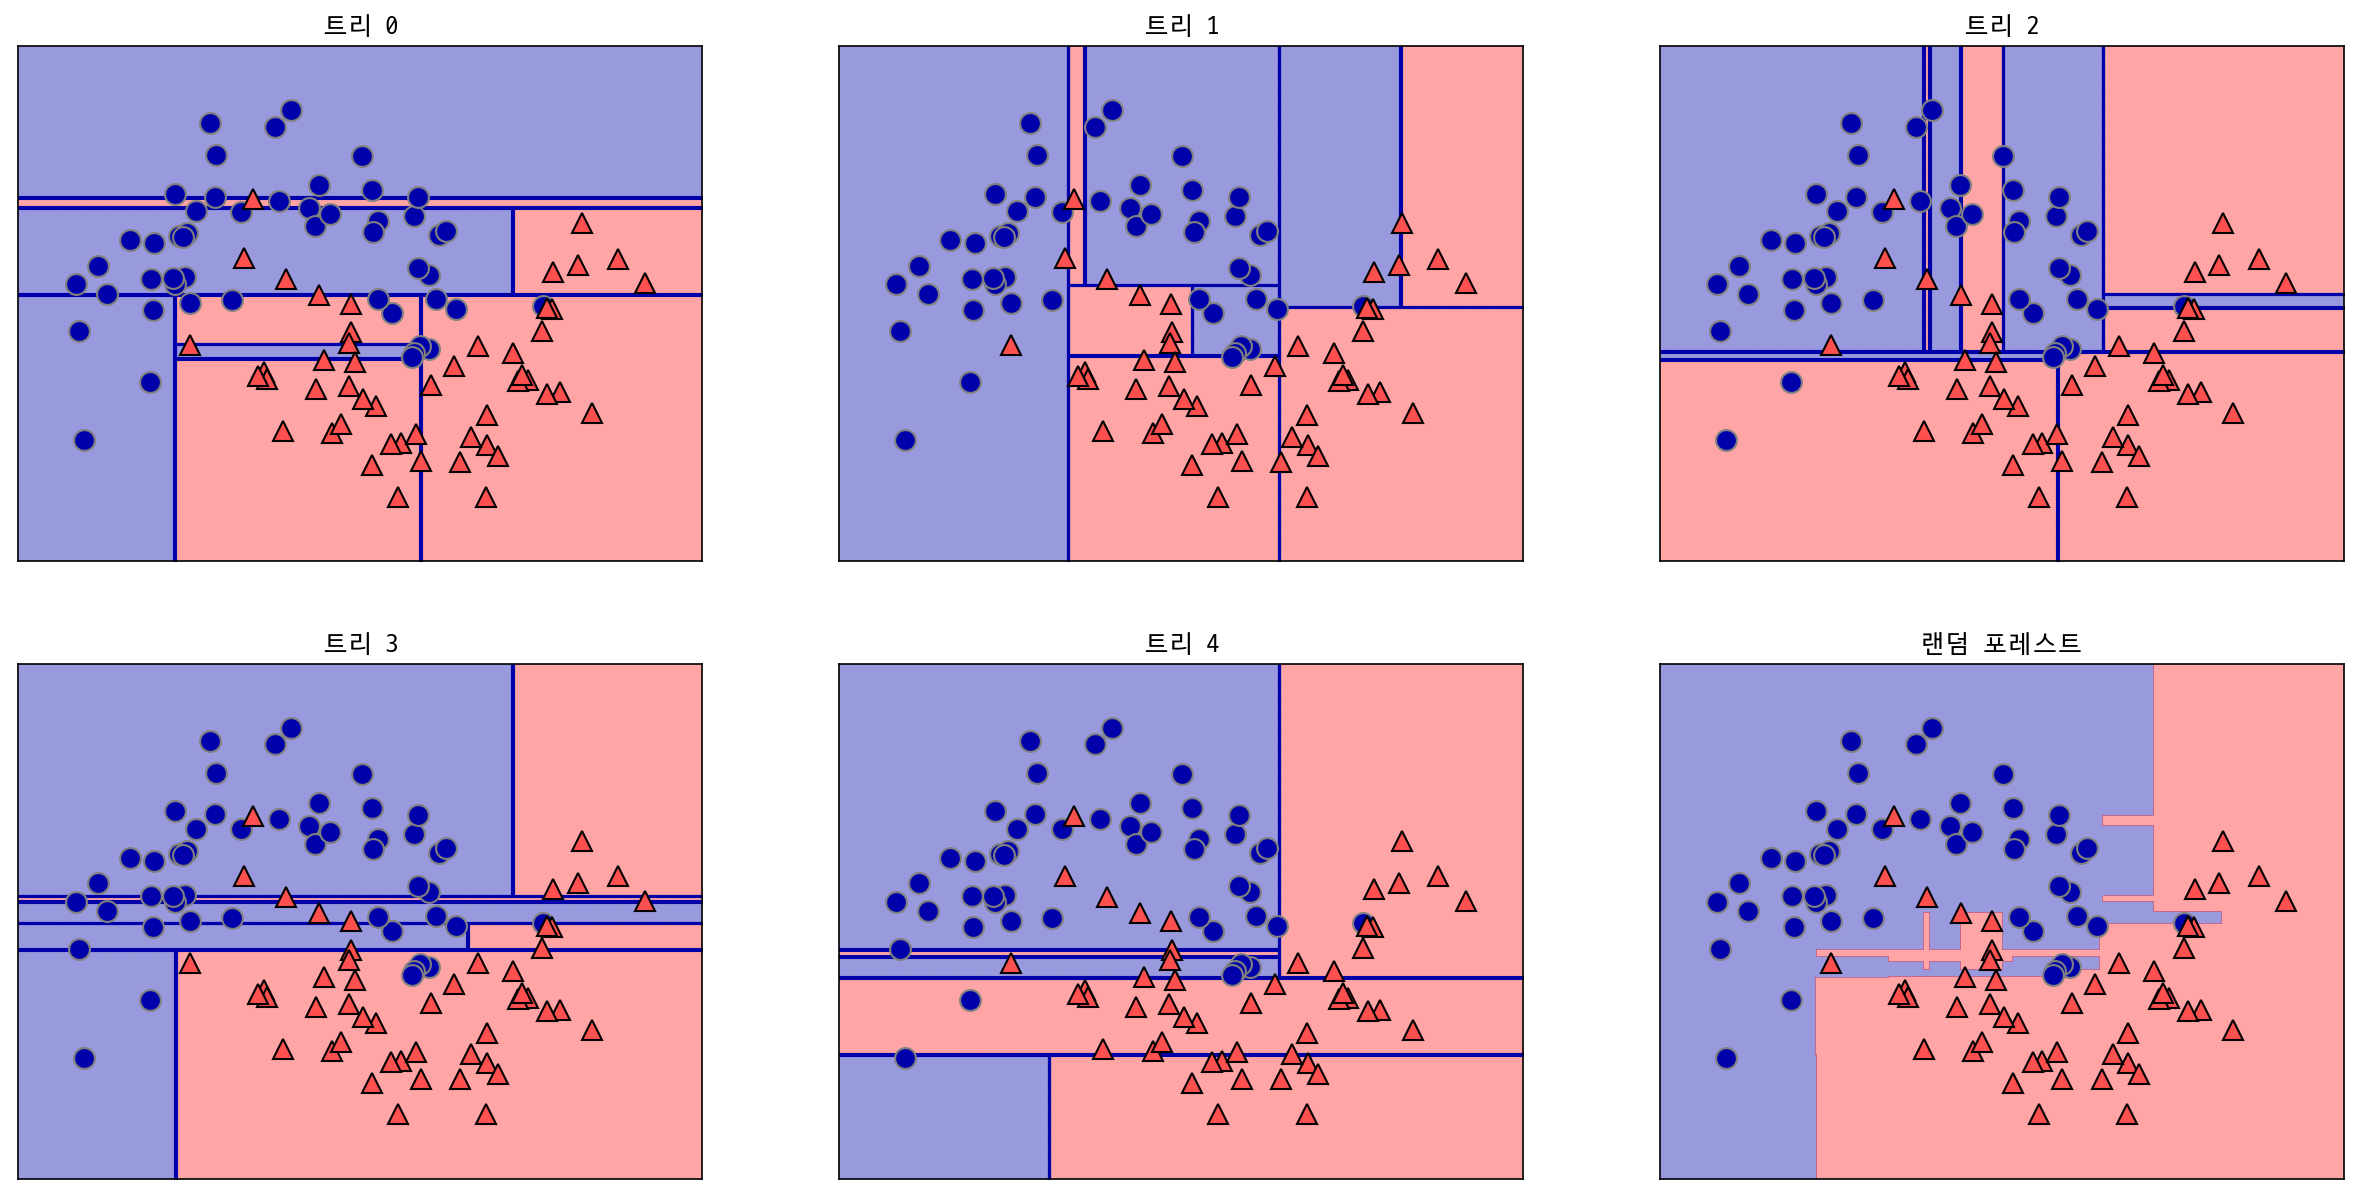

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2) # default=auto --> max_features = sqrt(n_features)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

그림 2-33 다섯 개의 랜덤한 결정 트리의 결정 경계와 예측한 확률을 평균내어 만든 결정 경계(랜덤 포레스트)

* 다섯개의 결정 경계가 확연히 다르고
* 랜덤 포레스트는 개개의 트리보다 덜 과대적합되었고, 훨씬 좋은 결정 경계를 만들어 준다.
* 실제는 수백, 수천 개의 트리를 사용하기 때문에 더 부드러운 결정 경계를 만들어 준다.

다른 예로 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤 포레스트를 적용해보자.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


* 랜덤 포레스트는 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 97% 정확도를 내고 있다.
* 단일 결정 트리에서 처럼 max_features 매개변수를 조정하거나 사전 가지치기를 할 수 있으나 랜덤 포레스트는 기본 설정으로도 좋은 결과를 준다.


랜덤 포레스트도 특성 중요도를 제공한다.

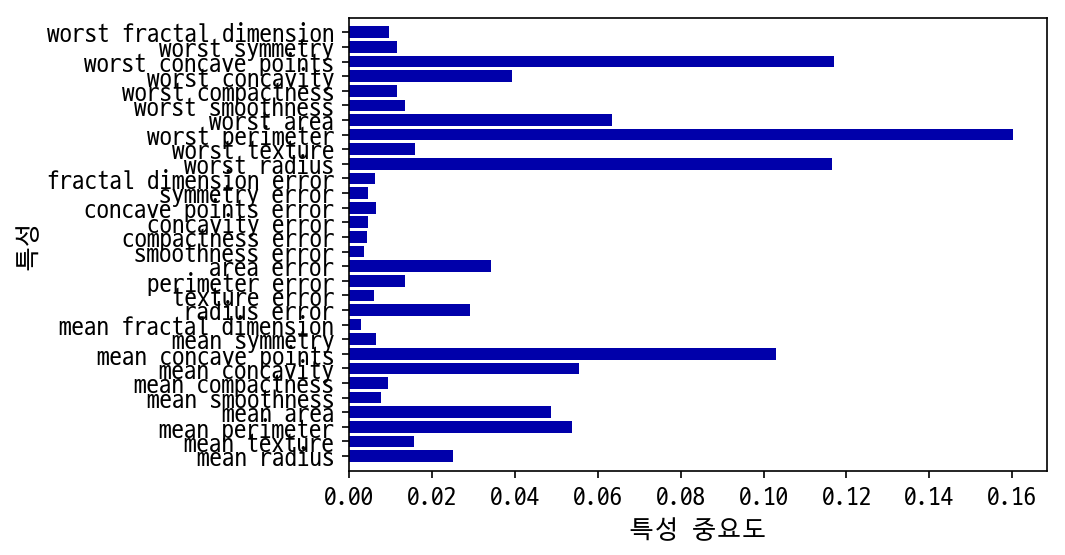

In [27]:
plot_feature_importances_cancer(forest)

* 단일 트리의 결과와 마찬가지로 랜덤 포레스트도 "worst radius"를 중요한 특성을 보지만 가장 많은 정보를 가진특성으로 "worst perimeter"를 선택
* 랜덤 포레스트가 만드는 무작위성으로 인해 알고리즘이 가능성 있는 많은 경우를 고려할 수 있고 그 결과 단일 트리보다 더 넓은 시각으로 데이터를 바로 볼 수 있다.

#### 장단점과 매개 변수

* 장점: 회귀와 분류에서 가장 널리 사용되는 머신러닝 알고리즘. **성능이 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없다**.
* 단점: **텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다**. 이런 데이터에는 선형 모델이 더 적합하다. 선형 모델보다 더 많은 메모리를 사용하며 훈련과 예측이 느리다.

* 주요 매개변수: n_estimators, max_features, max_depth 등이 있다. 
    - n_estimators는 클수록 품질(과대적합을 줄여준다)이 좋지만 시간과 메모리가 많이 든다. 
    - max_features는 각 트리가 얼마나 무작위가 될지를 결정한다. 기본값으로 분류는 max_features = sqrt(n_features) 회귀는 max_features = n_features이다. 일반적으로 기본값을 쓰는 것이 좋은 방법이다.

### 그래디언트 부스팅 회귀 트리(Gradient Boosted Regression Tree, GBRT)

* 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법
* 이름이 회귀이지만 회귀와 분류 모두에 사용할 수 있다.
* 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적인 트리를 만든다. 
* 그리고 기본적으로 무작위성이 없고 강력한 사전 가지치기를 사용한다. 
* 1~5개의 깊지 않은 트리(얕은 트리로 약한 학습, weak learner)를 사용함으로 메모리가 적고 속도가 빠르다.  
* 중요 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 **learning_rate**이다. 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만든다.
* n_estimators 값을 크게하면 앙상블에 더 많은 트리가 추가되어 복잡도가 크진다.


유방암 데이터셋에 그래디언트 부스팅 기본값(깊이3인 트리 100개, 학습률 0.1)을 사용했다.

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


훈련 세트의 정확도가 100%이므로 과대적합된 것 같다. 트리의 최대 깊이를 줄이거나 학습률을 낮춘다.

In [29]:
# 최대 깊이: 3 --> 1
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

# 학습률: 0.1 --> 0.01
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


트리의 최대 깊이를 낮추는 것이 학습률을 낮추는 것보다 모델 성능 향상에 크게 기여했다.

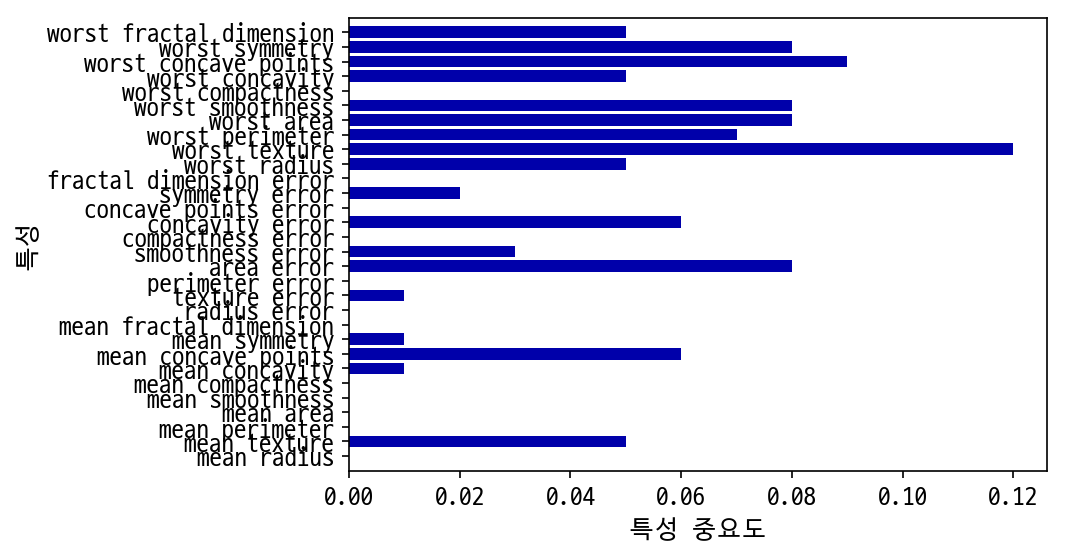

In [30]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

랜덤 포레스트와 중요도가 비슷하지만 일부 특성을 완전히 무시(mean smoothness,mean area, mean perimeter 등)하고 있다.

#### 장단점과 매개변수

* 장점: 특성의 스케일을 조정할 필요가 없고 이진 특성과 연속적인 특성에 모두 잘 동작한다.
* 단점: 매개변수를 잘 조정해야하고 훈련 시간이 길다. 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 동작하지 않는다.
* 주요 매개변수: n_estimators(트리의 개수를 지정), learnin_rate(오차를 보정하는 정도를 조절)이다.  **n_estimators는 랜덤 포레스트와 달리 크게하면 모델이 복잡해지고 과대적합될 가능성이 높아진다**. 일반적으로 가용한 시간과 메모리 한도에서 트리 개수를 맞추고 적절한 학습률을 찾는다. max_depth는 모델의 복잡도를 낮춰준다. 5이하의 값을 준다

### 2.3.7 커널 서포트 벡터 머신

![](https://t1.daumcdn.net/cfile/tistory/995D673359E9AD3537)
그림. 가장 데이터를 잘 분류해낸 선은 H3이다. 마진(margin)이 가장 크기 때문  

![](https://t1.daumcdn.net/cfile/tistory/997D103359E9E0F323)
그림. 이상치(outlier)가 존재하는 경우
완벽한 분리가 불가능하기 때문에 오류를 허용하는 전략으로 cost(C)를 만듦. C는 얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지를 결정   

![](https://t1.daumcdn.net/cfile/tistory/99F2D73359EACDE930)
그림. 선형 SVM으로 제대로 분류할 수 없는 상황   

![](https://t1.daumcdn.net/cfile/tistory/990CD33359E9EC961E)
그림. 커널 기법에 대한 설명. 커널 함수를 적용하고 나니 선형적으로 분류할 수 있는 결정 경계를 찾게 됨

즉, **커널 기법은 주어진 데이터를 고차원 특징 공간으로 사상해주는 것**이다. 


![](https://t1.daumcdn.net/cfile/tistory/99A1933359EACD3732)
그림. 3차원 공간에서 분류된 것을 다시 2차원 공간으로 매핑해서 보면 위 그림과 같이 결정 경계가 원으로 보임 

커널 서포트 벡터 머신<sup>kernelized support vector machines</sup>은 선형 서포트 벡터 머신을 입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것이다.

#### 선형 모델과 비선형 특성
그림 2-15에서 보듯이 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델이 매우 제한적이다. 선형 모델을 유연하게 만드는 방법중 하나는 특성끼리 곱하거나 거듭제곱하는 식으로 새로운 특성을 추가하는 것이다.  

![](https://github.com/hopypark/Intro_ML/blob/master/images/download.png?raw=true)



그림2-15. forge 데이터셋에 기본 매개변수를 사용해 만든 선형 SVM과 로지스틱 회귀 모델의 결정 경계 



109페이지 "트리의 특성 중요도"절에서 사용한 인위적 데이터셋을 다시 보자.

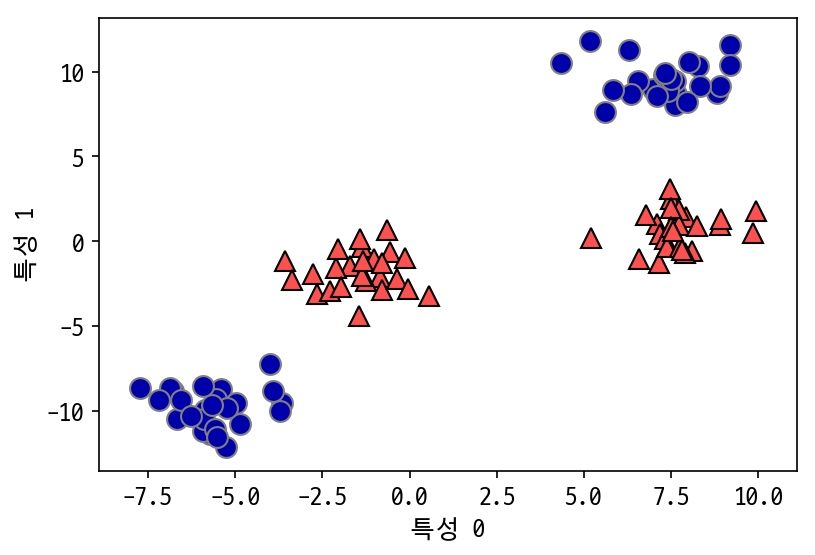

In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

plt.show()
# 그림 2-36. 선형적으로 구분되지 않는 클래스를 가진 이진분류 데이터셋


분류를 위한 선형 모델은 데이터 포인트를 잘 나눌수 있기 때문에 이런 데이터셋에는 잘 맞지 않는다(그림 2-37).

Text(0,0.5,'특성 1')

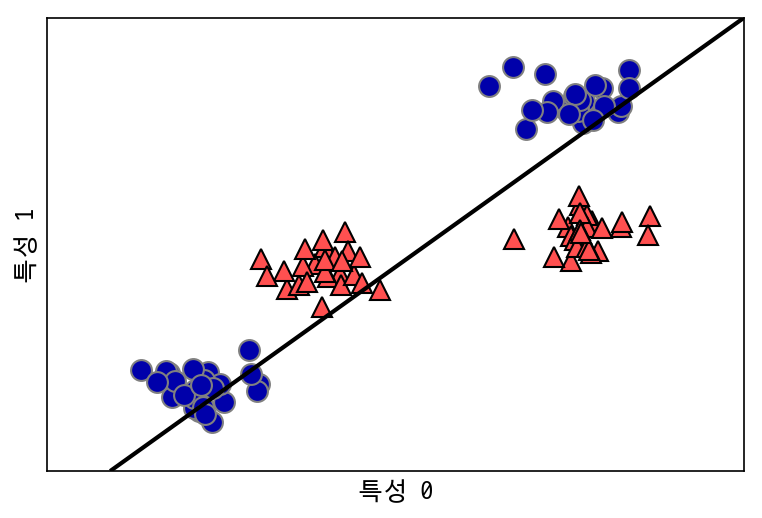

In [32]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

선형 모델은 직선으로만 데이터를 나눌 수 있어 이런 데이터셋에는 잘 맞지 않는다.  

두 번째 특성을 제곱한 ${특성1}^{2}$를 새로운 특성으로 추가입력해 특성을 확장해 보자.

Text(0.5,0,'특성1 ** 2')

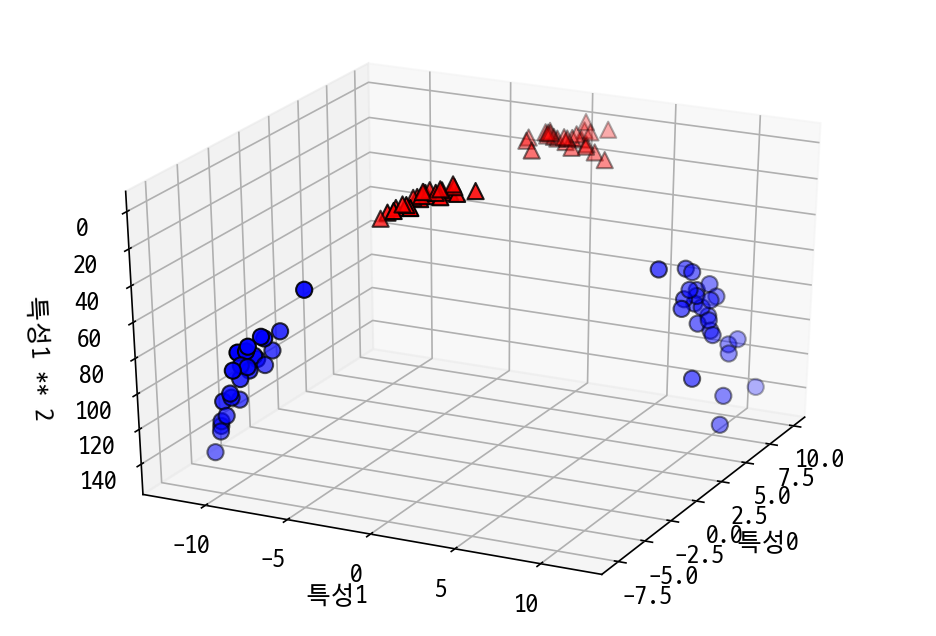

In [33]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

그림2-38 특성1에서 유용한 세번째 특성을 추가하여 그림 2-37을 확장한 데이터셋

새로운 데이터셋에서는 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분할 수 있다(그림 2-39).

Text(0.5,0,'특성1 ** 2')

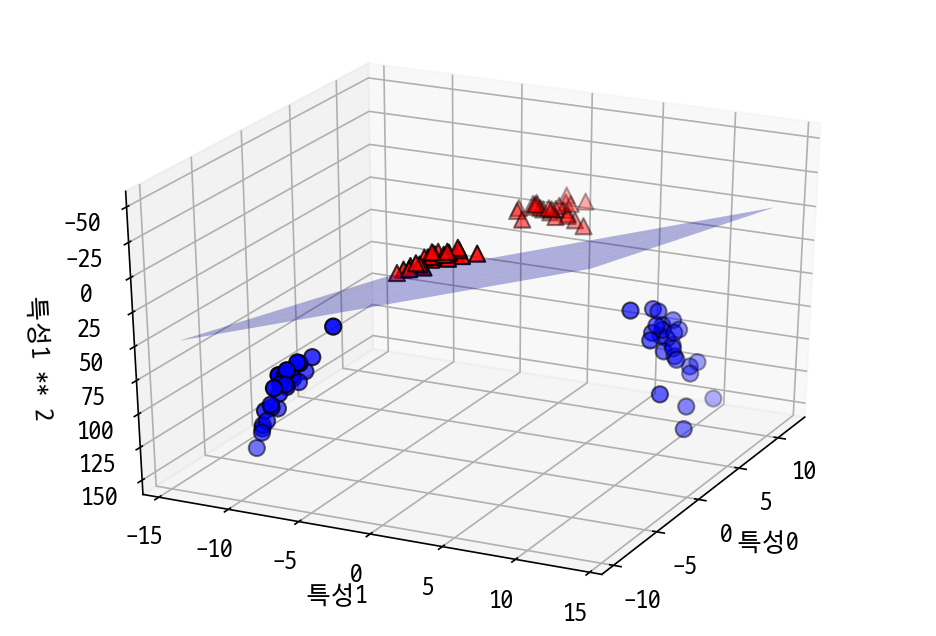

In [34]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

그림 2-39 확장된 3차원 데이터셋에서 선형 SVM이 만든 결정 경계

새로운 데이터셋에서는 평면을 사용해 두 클래스를 구분할 수 있다. 원래 특성으로 투영해보면 이 선형 SVM 모델은 선형이 아니라 타원에 가까운 모습이 된다.

Text(0,0.5,'특성 1')

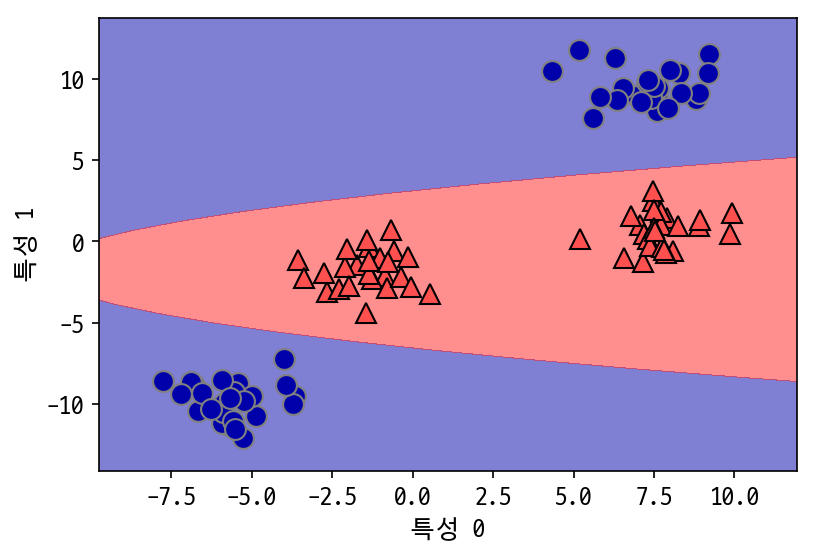

In [35]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

그림 2-40 원래 두 개 특성에 투명한 그림 2-39의 결정 경계

#### 커널 기법

비선형 특성을 추가하면 선형 모델이 강력해지지만 어떤 특성을 추가해야될지 모르고 많은 특성을 추가하면 연산 비용이 커진다. **커널 기법<sup>kernel trick</sup>**을 사용해 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리(스칼라 곱)을 계산할 수 있다.

서포트 벡터 머신에서 데이터를 고차원 공간에 매핑하는데 많이 사용하는 방법은 두 가지이다.

* 다항식 커널: 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산(특성1<sup>2</sup> X 특성2<sup>5</sup>)
* RBF<sup>radial basis function</sup> 커널: 가우시안<sup>Gaussian</sup> 커널이라고도 불린다. 차원이 무한한 특성 공간으로 매핑하는 것. 모든 차수의 모든 다항식을 고려하는 것으로 이해하면 좋다.
  
#### SVM 이해하기
학습이 진행되는 동은 SVM은 각 훈련 데이터 포인트가 두 클래스의 결정 경계를 구분하는데 얼마나 중요한지를 배운다. 일반적으로 결정 경계를 만드는데는 경계에 위치한 일부 훈련 데이터만 영향을 준다. 이런 데이터 포인트를 **서포트 벡터**라고 한다.  

새로운 데이터에 대해 예측하려면 각 서포트 벡터와의 거리를 측정한다. 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산된다.  

$$ k_{rbf} (x_1, x_2) = \exp(-\gamma \lVert x_1 - x_2 \rVert^2) $$

$x_1, x_2$: 데이터 포인트, $\lVert x_1 - x_2 \rVert$: 유클리드 거리, $\gamma$: 가우시안 커널의 폭을 제어하는 매개변수

아래는 두 개의 클래스를 가진 2차원 forge 데이터셋의 SVM학습 결과이다. 결정 경계는 검은 실선, 서포트 벡터는 굵은 테두리로 처리했다. SVM은 매우 부드럽고 비선형인 경계를 만들었다.

Text(0,0.5,'특성 1')

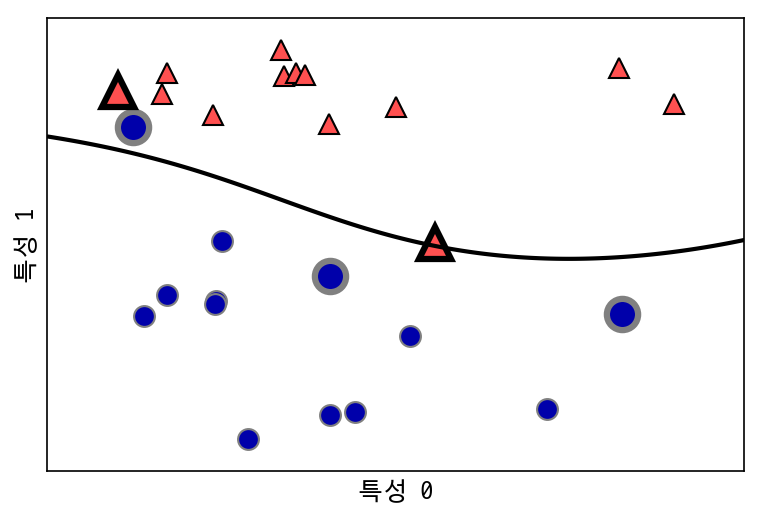

In [36]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### SVM 매개변수 튜닝
* gamma: 가우시안 커널 폭의 역수에 해당. 하나의 훈련 샘플이 미치는 영향의 범위를 결정한다. 클수록 영향을 미치는 범위가 적어진다.
* C: 선형 모델의 규제 매개변수에 해당. 각 포인트의 중요도(duel_coef_값)을 제한.  

각 매개변수를 다르게 했을 때 어떻게 변경되는지 확인하자.

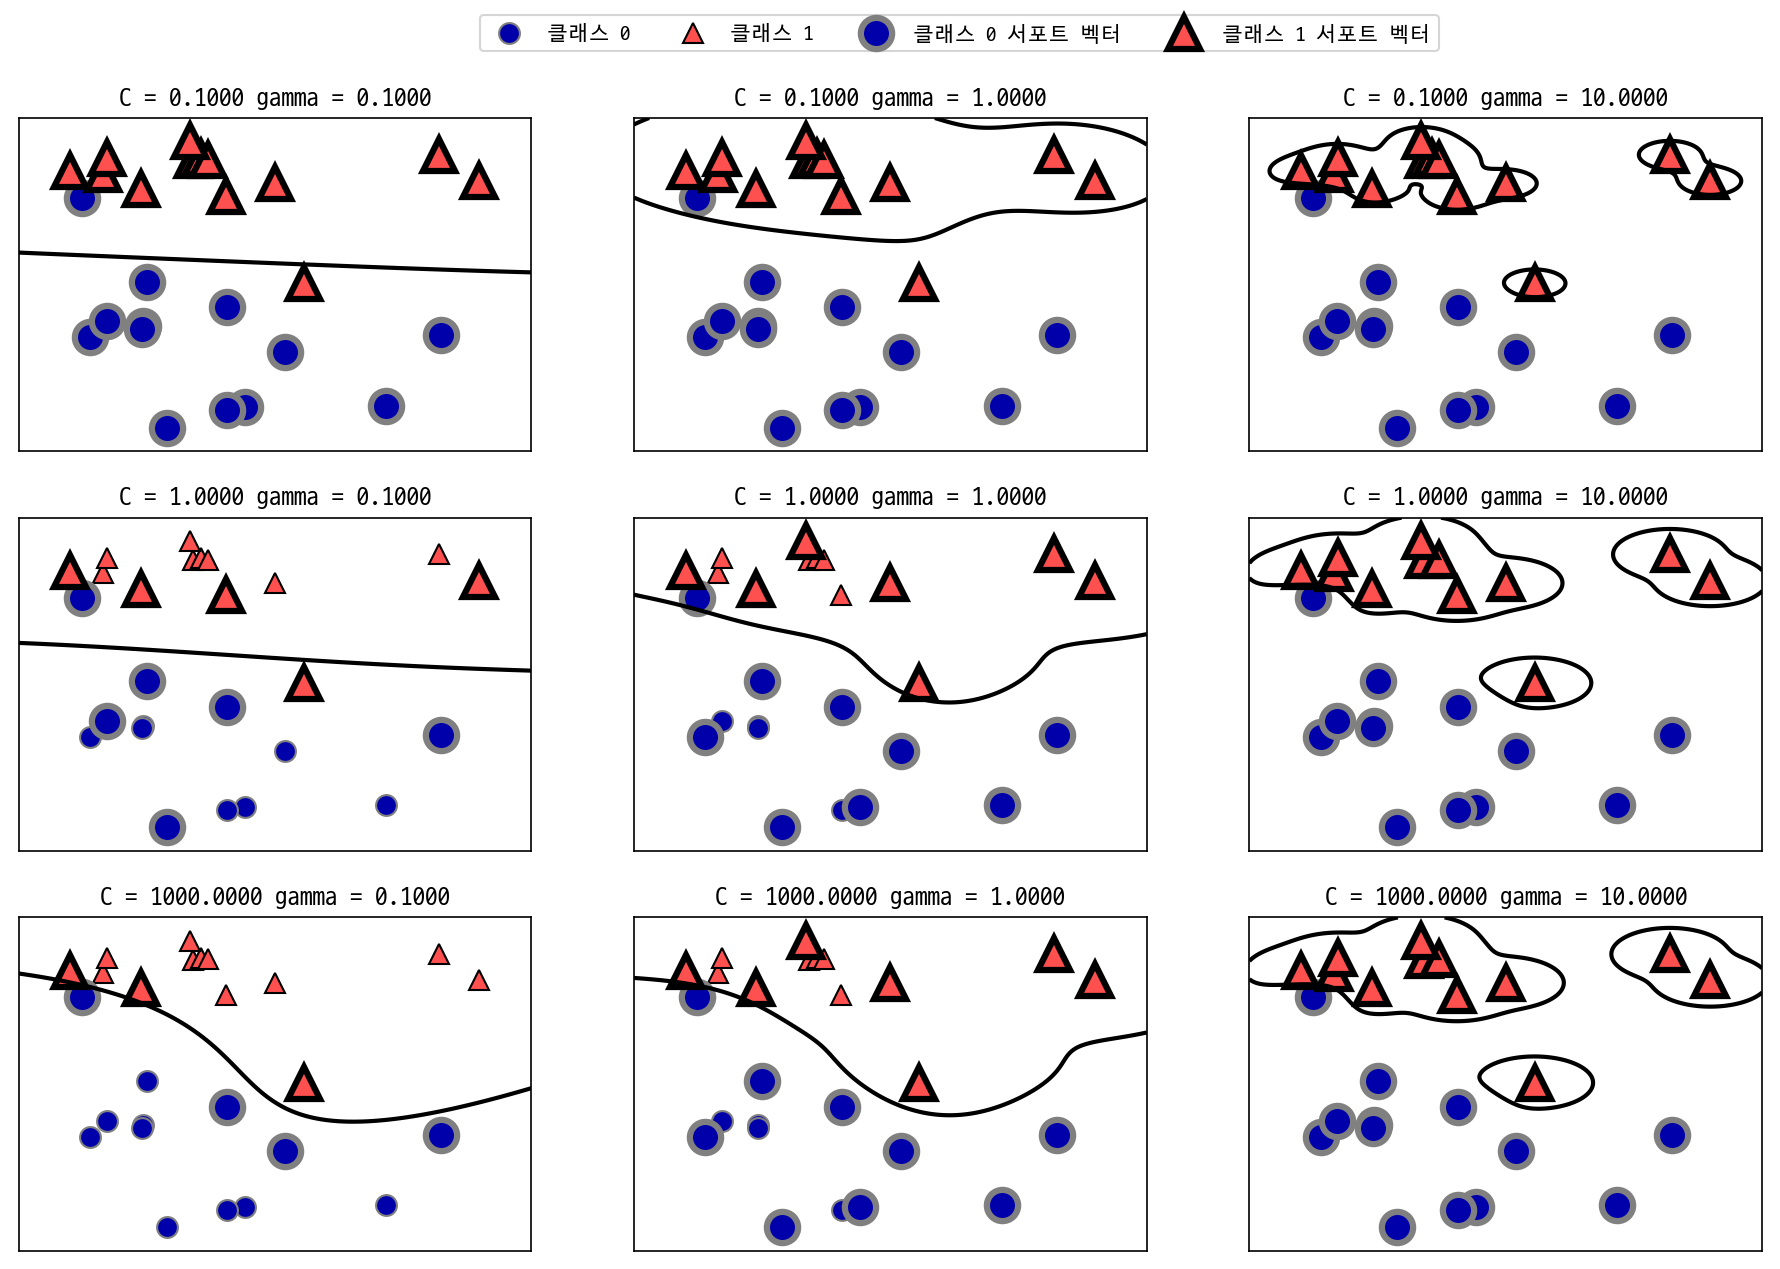

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

그림 2-42 C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터  

  
감마값이 커질수록 경계가 개별 포인트에 민감해져 복잡한 모델을 만든다.  
작은 C값은 제약이 큰 모델을 만들며 각 데이터 포인트의 영향력이 작다. 

RBF 커널 SVM을 유방암 데이터셋에 적용한다.(기본값 C=1, gamma=1/n_features)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))


훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


훈련 세트는 100%지만 테스트 세트는 63%이기 때문에 상당히 과적합되었다.  

유방암 데이터셋의 특성 값 범위(y축은 로그 스케일)를 살펴보자. 일부 특성은 자릿수 자체가 완전히 다르고 이것이 일부 모델에서도 문제가 될 수 있지만 SVM에서는 아주 크다.

Text(0,0.5,'특성 크기')

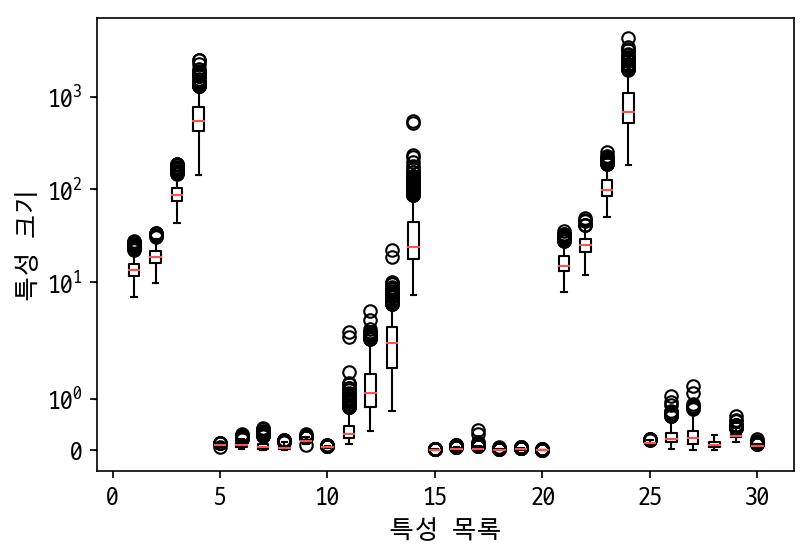

In [39]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

#### SVM을 위한 데이터 전처리¶  

이 문제를 해결하는 방법 중 하나는 특성 값의 범위가 비슷해지도록 조정하는 것이다. 모든 특성 값을 0~1로 맞추는 방법을 많이 사용한다. MinMaxScaler 전처리 메소드를 사용할 수 있다.  
여기에서는 아래 식을 통해 직접 제작한다.

 $$ \frac{X-min(X)}{max(X)-min(X)} $$

In [40]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training

print("특성별 최솟값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최댓값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최솟값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [41]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


데이터의 스케일을 조정하고 매개변수를 조절해서 과적합을 해결해 성능을 향상시킬 수 있다.

#### 장단점과 매개변수
* 장점: 저차원과 고차원(특성이 적거나 많을 때)에서 모두 잘 작동하고 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있다.
* 단점: 샘플이 많을 때(100,000개 이상)는 속도와 메모리 문제가 있을 수 있다. 전처리와 매개변수 설정에 민감하다. 모델을 분석하기 어렵다.
* 주요 매개변수
   * C: 규제 매개변수
   * 커널의 종류: scikit-learn에선 'rbf' (기본값), 'linear' $(x_1 \cdot x_2)$, 'poly' $(\gamma(x_1 \cdot x_2)+c)^d$, 'sigmoid' $(\tanh(\gamma(x_1 \cdot x_2)+c))$, 'precomputed' (미리 계산된 값을 사용) 등을 지원